In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os
os.environ["KERAS_BACKEND"] = 'pytorch'
import keras

In [2]:
keras.utils.set_random_seed(88888888)

In [3]:
# Setup

def vectorize_sequences(sequences, dimension=10000):
    # matrix of zeros
    results = np.zeros((len(sequences), dimension))
    print(results.shape)
    # for each review, set each word index it contains to 1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

x_val = x_train[:10000]
y_val = y_train[:10000]



(25000, 10000)
(25000, 10000)


In [4]:
# Examine data
word_index = keras.datasets.imdb.get_word_index()

ri = np.random.randint(len(train_labels))

index = {v + 3: k for k, v in word_index.items()}
print("Review:")
print(' '.join(index.get(i, ' ') for i in train_data[ri][:10]))
print(f"Label: {train_labels[ri]} (0 negative, 1 positive)")


# Vectorized data
# we ignore word order and instead end up with a multi-hot encoding of binary word occurance
print(x_train[0])


Review:
  i heard this film was much more   than
Label: 0 (0 negative, 1 positive)
[0. 1. 1. ... 0. 0. 0.]


In [5]:
model = keras.models.Sequential()
model.add(keras.Input((10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [6]:
# baseline
correct = (np.random.randint(0,2, size=len(y_test)) == y_test).sum()
print(f"random baseline: {correct / len(y_test)}")

# untrained network
loss, accuracy = model.evaluate(partial_x_train, partial_y_train)
print(f"untrained: loss={loss}, accuracy={accuracy}")


random baseline: 0.50144
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5035 - loss: 0.7073
untrained: loss=0.7073413133621216, accuracy=0.5035333037376404


In [7]:
# train
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7850 - loss: 0.4628 - val_accuracy: 0.8891 - val_loss: 0.2944
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9241 - loss: 0.2092 - val_accuracy: 0.8860 - val_loss: 0.2835
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.1353 - val_accuracy: 0.8759 - val_loss: 0.3344
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9677 - loss: 0.0998 - val_accuracy: 0.8733 - val_loss: 0.3908
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1215 - val_accuracy: 0.8589 - val_loss: 0.4893
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.0941 - val_accuracy: 0.8695 - val_loss: 0.4511
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0470 - val_accuracy: 0.8711 - val_loss: 0.4656
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0229 - val_accuracy: 0.

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [9]:
history_dict['loss']

[0.46275508403778076,
 0.2091856449842453,
 0.13525979220867157,
 0.0997518002986908,
 0.12148948758840561,
 0.09410041570663452,
 0.04697801545262337,
 0.022935349494218826,
 0.014955176040530205,
 0.010395876131951809,
 0.007477668114006519,
 0.005528172943741083,
 0.004433330148458481,
 0.0031416870187968016,
 0.0021838222164660692,
 0.0016753048403188586,
 0.0013362207682803273,
 0.0011025725398212671,
 0.000922617269679904,
 0.0007787223439663649]

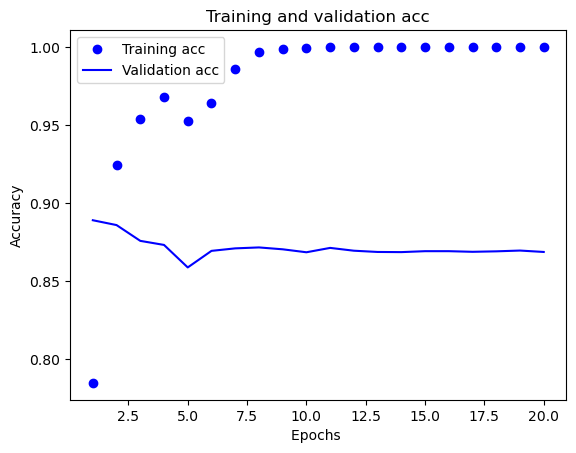

In [10]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)
blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, acc, blue_dots, label='Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

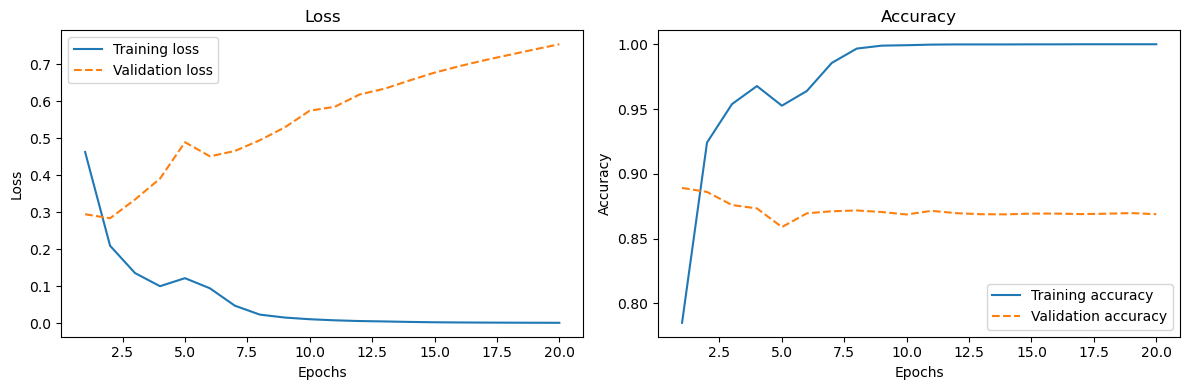

In [11]:
# reusable

def plot_history(history):
    hd = history.history
    loss = hd['loss']
    val_loss = hd['val_loss']
    acc = hd['accuracy']
    val_acc = hd['val_accuracy']
    epochs = range(1, len(loss) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    ax1.plot(epochs, loss, label='Training loss')
    ax1.plot(epochs, val_loss, '--', label='Validation loss')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.plot(epochs, acc,  label='Training accuracy')
    ax2.plot(epochs, val_acc, '--', label='Validation accuracy')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)
    

## Experiments

In [71]:
from IPython.display import display, Markdown, clear_output

def bold_if(condition, text):
    return f"**{text}**" if condition else text

def show_experiment_log(experiments):
    header = "|experiment| optimizer|batch size|learning rate | momentum | activation|layers| units |epochs | train_acc | validation_acc | best_acc | train_loss | validation_loss\n|---|---|---|---|---|---|---|---|---|---|---|---|---|---|"

    info = []
    best_idx = np.argmax([exp.get('best_val_acc', 0) for exp in experiments])

    for i, experiment in enumerate(experiments):
        best_acc_string = bold_if(best_idx == i, f"{experiment['best_val_acc']:.4f} in epoch {experiment['best_epoch']}")
        info.append(f"|{experiment['info']}|{experiment['optimizer'].name}|{experiment['batch_size']}|{float(experiment['optimizer'].learning_rate):<.4f}|{experiment['optimizer'].momentum if hasattr(experiment['optimizer'], 'momentum') else 'N/A'}|{experiment['activation']}|{experiment['layers']}|{experiment['units']}|{experiment['epochs']}|{experiment['train_acc']:.4f}|{experiment['val_acc']:.4f}|{best_acc_string}|{experiment['train_loss']:.4f}|{experiment['val_loss']:.4f}")
        clear_output(wait=True)
        display(Markdown(f"{header}\n{"\n".join(info)}"))

def run_experiment(experiment, plot=True):
    model = keras.models.Sequential()
    model.add(keras.Input((10000,)))
    for _ in range(0, experiment['layers']):
        model.add(keras.layers.Dense(experiment['units'], activation=experiment['activation']))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=experiment['optimizer'],
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=experiment['epochs'],
        batch_size=experiment['batch_size'],
        validation_data=(x_val, y_val),
        verbose=0,
    )

    if plot:
        plot_history(history)

    experiment['train_acc'] = history.history['accuracy'][-1]
    experiment['val_acc'] = history.history['val_accuracy'][-1]
    experiment['train_loss'] = history.history['loss'][-1]
    experiment['val_loss'] = history.history['val_loss'][-1]
    experiment['best_epoch'] = np.argmax(history.history['val_accuracy'])
    experiment['best_val_acc'] = history.history['val_accuracy'][experiment['best_epoch']]

    
def run_experiments(experiments):
    for i,experiment in enumerate(experiments):
        run_experiment(experiment, False)
        print(f"\r[{i+1}/{len(experiments)}]", end="")


Let's constrain the number of epochs to 5 and see how good we can get

In [77]:
baselines = [
    {
        'info': 'adam relu baseline',
        'optimizer': keras.optimizers.Adam(),
        'activation': 'relu',
        'layers': 1,
        'units': 16,
        'epochs': 5,
        'batch_size': 128,
    },
    {
        'info': 'adam tanh baseline',
        'optimizer': keras.optimizers.Adam(),
        'activation': 'tanh',
        'layers': 1,
        'units': 16,
        'epochs': 5,
        'batch_size': 128,
    },
    {
        'info': 'sgd+momentum baseline',
        'optimizer': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
        'activation': 'relu',
        'layers': 1,
        'units': 16,
        'epochs': 5,
        'batch_size': 128,
    },
]


run_experiments(baselines)
show_experiment_log(baselines)


|experiment| optimizer|batch size|learning rate | momentum | activation|layers| units |epochs | train_acc | validation_acc | best_acc | train_loss | validation_loss
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|adam relu baseline|adam|128|0.0010|N/A|relu|1|16|5|0.9737|0.8819|**0.8898 in epoch 1**|0.0976|0.3181
|adam tanh baseline|adam|128|0.0010|N/A|tanh|1|16|5|0.9781|0.8771|0.8879 in epoch 0|0.0850|0.3441
|sgd+momentum baseline|SGD|128|0.0100|0.9|relu|1|16|5|0.9176|0.8831|0.8831 in epoch 4|0.2214|0.2971

In [78]:
batch_sizes = [512, 256, 128, 64, 32, 16] #lower than 16 starts to take a really long time (3+ minutes)
batch_experiments = []

for size in batch_sizes:
    batch_experiments.append({
        'info': "batch size test",
        'optimizer': keras.optimizers.Adam(),
        'activation': 'relu',
        'layers': 1,
        'units': 16,
        'epochs': 5,
        'batch_size': size
    })


run_experiments(batch_experiments)
show_experiment_log(baselines + batch_experiments)

|experiment| optimizer|batch size|learning rate | momentum | activation|layers| units |epochs | train_acc | validation_acc | best_acc | train_loss | validation_loss
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|adam relu baseline|adam|128|0.0010|N/A|relu|1|16|5|0.9737|0.8819|0.8898 in epoch 1|0.0976|0.3181
|adam tanh baseline|adam|128|0.0010|N/A|tanh|1|16|5|0.9781|0.8771|0.8879 in epoch 0|0.0850|0.3441
|sgd+momentum baseline|SGD|128|0.0100|0.9|relu|1|16|5|0.9176|0.8831|0.8831 in epoch 4|0.2214|0.2971
|batch size test|adam|512|0.0010|N/A|relu|1|16|5|0.9521|0.8849|0.8871 in epoch 3|0.1697|0.2835
|batch size test|adam|256|0.0010|N/A|relu|1|16|5|0.9621|0.8863|0.8885 in epoch 1|0.1304|0.2849
|batch size test|adam|128|0.0010|N/A|relu|1|16|5|0.9743|0.8822|0.8894 in epoch 1|0.0956|0.3241
|batch size test|adam|64|0.0010|N/A|relu|1|16|5|0.9846|0.8766|0.8907 in epoch 0|0.0686|0.3854
|batch size test|adam|32|0.0010|N/A|relu|1|16|5|0.9885|0.8719|**0.8914 in epoch 0**|0.0509|0.4608
|batch size test|adam|16|0.0010|N/A|relu|1|16|5|0.9949|0.8677|0.8832 in epoch 0|0.0283|0.5216

In one run it can show batch size 64 as best, in another it can show batch size 32, or another batch size 128.
So we should not just do one run and assume that somethign is best. The conclusino may actually be that there is not much difference (if we see similar best acc in similar epoch)

In [80]:
learning_rates = [0.1, 0.01, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
lr_experiments = []

for lr in learning_rates:
    lr_experiments.append({
        'info': "lr test",
        'optimizer': keras.optimizers.Adam(learning_rate=lr),
        'activation': 'relu',
        'layers': 1,
        'units': 16,
        'epochs': 5,
        'batch_size': 128
    })


run_experiments(lr_experiments)
show_experiment_log(baselines + batch_experiments + lr_experiments)

|experiment| optimizer|batch size|learning rate | momentum | activation|layers| units |epochs | train_acc | validation_acc | best_acc | train_loss | validation_loss
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|adam relu baseline|adam|128|0.0010|N/A|relu|1|16|5|0.9737|0.8819|0.8898 in epoch 1|0.0976|0.3181
|adam tanh baseline|adam|128|0.0010|N/A|tanh|1|16|5|0.9781|0.8771|0.8879 in epoch 0|0.0850|0.3441
|sgd+momentum baseline|SGD|128|0.0100|0.9|relu|1|16|5|0.9176|0.8831|0.8831 in epoch 4|0.2214|0.2971
|batch size test|adam|512|0.0010|N/A|relu|1|16|5|0.9521|0.8849|0.8871 in epoch 3|0.1697|0.2835
|batch size test|adam|256|0.0010|N/A|relu|1|16|5|0.9621|0.8863|0.8885 in epoch 1|0.1304|0.2849
|batch size test|adam|128|0.0010|N/A|relu|1|16|5|0.9743|0.8822|0.8894 in epoch 1|0.0956|0.3241
|batch size test|adam|64|0.0010|N/A|relu|1|16|5|0.9846|0.8766|0.8907 in epoch 0|0.0686|0.3854
|batch size test|adam|32|0.0010|N/A|relu|1|16|5|0.9885|0.8719|**0.8914 in epoch 0**|0.0509|0.4608
|batch size test|adam|16|0.0010|N/A|relu|1|16|5|0.9949|0.8677|0.8832 in epoch 0|0.0283|0.5216
|lr test|adam|512|0.1000|N/A|relu|1|16|5|0.9266|0.8688|0.8688 in epoch 4|0.1752|0.4465
|lr test|adam|512|0.0100|N/A|relu|1|16|5|0.9349|0.8730|0.8865 in epoch 0|0.1938|0.4317
|lr test|adam|512|0.0010|N/A|relu|1|16|5|0.9496|0.8874|0.8876 in epoch 3|0.1742|0.2821
|lr test|adam|512|0.0020|N/A|relu|1|16|5|0.9721|0.8833|0.8893 in epoch 1|0.1016|0.3046
|lr test|adam|512|0.0030|N/A|relu|1|16|5|0.9601|0.8700|0.8894 in epoch 1|0.1095|0.3794
|lr test|adam|512|0.0040|N/A|relu|1|16|5|0.9381|0.8131|0.8873 in epoch 1|0.1450|0.7214
|lr test|adam|512|0.0050|N/A|relu|1|16|5|0.9391|0.8656|0.8870 in epoch 0|0.1477|0.4569
|lr test|adam|512|0.0060|N/A|relu|1|16|5|0.9291|0.8270|0.8878 in epoch 0|0.1824|0.7016
|lr test|adam|512|0.0070|N/A|relu|1|16|5|0.9239|0.7863|0.8874 in epoch 1|0.1862|0.9058
|lr test|adam|512|0.0080|N/A|relu|1|16|5|0.9412|0.8775|0.8877 in epoch 0|0.1569|0.4379
|lr test|adam|512|0.0090|N/A|relu|1|16|5|0.9229|0.7877|0.8867 in epoch 0|0.1969|0.8804

In [83]:
# depth tests
depths = [1, 2, 4, 6, 8, 16]
depth_experiments = []

for depth in depths:
    depth_experiments.append({
        'info': "depth test",
        'optimizer': keras.optimizers.Adam(learning_rate=0.001),
        'activation': 'relu',
        'layers': depth,
        'units': 16,
        'epochs': 5,
        'batch_size': 128
    })


run_experiments(depth_experiments)
show_experiment_log(baselines + batch_experiments + lr_experiments + depth_experiments)

|experiment| optimizer|batch size|learning rate | momentum | activation|layers| units |epochs | train_acc | validation_acc | best_acc | train_loss | validation_loss
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|adam relu baseline|adam|128|0.0010|N/A|relu|1|16|5|0.9737|0.8819|0.8898 in epoch 1|0.0976|0.3181
|adam tanh baseline|adam|128|0.0010|N/A|tanh|1|16|5|0.9781|0.8771|0.8879 in epoch 0|0.0850|0.3441
|sgd+momentum baseline|SGD|128|0.0100|0.9|relu|1|16|5|0.9176|0.8831|0.8831 in epoch 4|0.2214|0.2971
|batch size test|adam|512|0.0010|N/A|relu|1|16|5|0.9521|0.8849|0.8871 in epoch 3|0.1697|0.2835
|batch size test|adam|256|0.0010|N/A|relu|1|16|5|0.9621|0.8863|0.8885 in epoch 1|0.1304|0.2849
|batch size test|adam|128|0.0010|N/A|relu|1|16|5|0.9743|0.8822|0.8894 in epoch 1|0.0956|0.3241
|batch size test|adam|64|0.0010|N/A|relu|1|16|5|0.9846|0.8766|0.8907 in epoch 0|0.0686|0.3854
|batch size test|adam|32|0.0010|N/A|relu|1|16|5|0.9885|0.8719|**0.8914 in epoch 0**|0.0509|0.4608
|batch size test|adam|16|0.0010|N/A|relu|1|16|5|0.9949|0.8677|0.8832 in epoch 0|0.0283|0.5216
|lr test|adam|512|0.1000|N/A|relu|1|16|5|0.9266|0.8688|0.8688 in epoch 4|0.1752|0.4465
|lr test|adam|512|0.0100|N/A|relu|1|16|5|0.9349|0.8730|0.8865 in epoch 0|0.1938|0.4317
|lr test|adam|512|0.0010|N/A|relu|1|16|5|0.9496|0.8874|0.8876 in epoch 3|0.1742|0.2821
|lr test|adam|512|0.0020|N/A|relu|1|16|5|0.9721|0.8833|0.8893 in epoch 1|0.1016|0.3046
|lr test|adam|512|0.0030|N/A|relu|1|16|5|0.9601|0.8700|0.8894 in epoch 1|0.1095|0.3794
|lr test|adam|512|0.0040|N/A|relu|1|16|5|0.9381|0.8131|0.8873 in epoch 1|0.1450|0.7214
|lr test|adam|512|0.0050|N/A|relu|1|16|5|0.9391|0.8656|0.8870 in epoch 0|0.1477|0.4569
|lr test|adam|512|0.0060|N/A|relu|1|16|5|0.9291|0.8270|0.8878 in epoch 0|0.1824|0.7016
|lr test|adam|512|0.0070|N/A|relu|1|16|5|0.9239|0.7863|0.8874 in epoch 1|0.1862|0.9058
|lr test|adam|512|0.0080|N/A|relu|1|16|5|0.9412|0.8775|0.8877 in epoch 0|0.1569|0.4379
|lr test|adam|512|0.0090|N/A|relu|1|16|5|0.9229|0.7877|0.8867 in epoch 0|0.1969|0.8804
|depth test|adam|128|0.0010|N/A|relu|1|16|5|0.9755|0.8807|0.8888 in epoch 0|0.0920|0.3293
|depth test|adam|128|0.0010|N/A|relu|2|16|5|0.9555|0.8649|0.8885 in epoch 0|0.1135|0.4378
|depth test|adam|128|0.0010|N/A|relu|4|16|5|0.9544|0.8685|0.8874 in epoch 0|0.1241|0.4239
|depth test|adam|128|0.0010|N/A|relu|6|16|5|0.9627|0.8707|0.8850 in epoch 0|0.1059|0.4368
|depth test|adam|128|0.0010|N/A|relu|8|16|5|0.9673|0.8671|0.8734 in epoch 2|0.0879|0.4659
|depth test|adam|128|0.0010|N/A|relu|16|16|5|0.9653|0.8378|0.8803 in epoch 0|0.1051|0.5257

My conclusion so far is that the hyperprams don't make much of a difference. Perhaps because it starts overfitting in the first or second epoch.

In [84]:
# depth + unit tests
depths = [1, 2, 4, 6]
units = [4, 8, 16, 32, 64]
dim_experiments = []

for depth in depths:
    for count in units:
        dim_experiments.append({
            'info': "depth test",
            'optimizer': keras.optimizers.Adam(learning_rate=0.001),
            'activation': 'relu',
            'layers': depth,
            'units': count,
            'epochs': 5,
            'batch_size': 128
        })


run_experiments(dim_experiments)
show_experiment_log(baselines + batch_experiments + lr_experiments + depth_experiments + dim_experiments)

|experiment| optimizer|batch size|learning rate | momentum | activation|layers| units |epochs | train_acc | validation_acc | best_acc | train_loss | validation_loss
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|adam relu baseline|adam|128|0.0010|N/A|relu|1|16|5|0.9737|0.8819|0.8898 in epoch 1|0.0976|0.3181
|adam tanh baseline|adam|128|0.0010|N/A|tanh|1|16|5|0.9781|0.8771|0.8879 in epoch 0|0.0850|0.3441
|sgd+momentum baseline|SGD|128|0.0100|0.9|relu|1|16|5|0.9176|0.8831|0.8831 in epoch 4|0.2214|0.2971
|batch size test|adam|512|0.0010|N/A|relu|1|16|5|0.9521|0.8849|0.8871 in epoch 3|0.1697|0.2835
|batch size test|adam|256|0.0010|N/A|relu|1|16|5|0.9621|0.8863|0.8885 in epoch 1|0.1304|0.2849
|batch size test|adam|128|0.0010|N/A|relu|1|16|5|0.9743|0.8822|0.8894 in epoch 1|0.0956|0.3241
|batch size test|adam|64|0.0010|N/A|relu|1|16|5|0.9846|0.8766|0.8907 in epoch 0|0.0686|0.3854
|batch size test|adam|32|0.0010|N/A|relu|1|16|5|0.9885|0.8719|**0.8914 in epoch 0**|0.0509|0.4608
|batch size test|adam|16|0.0010|N/A|relu|1|16|5|0.9949|0.8677|0.8832 in epoch 0|0.0283|0.5216
|lr test|adam|512|0.1000|N/A|relu|1|16|5|0.9266|0.8688|0.8688 in epoch 4|0.1752|0.4465
|lr test|adam|512|0.0100|N/A|relu|1|16|5|0.9349|0.8730|0.8865 in epoch 0|0.1938|0.4317
|lr test|adam|512|0.0010|N/A|relu|1|16|5|0.9496|0.8874|0.8876 in epoch 3|0.1742|0.2821
|lr test|adam|512|0.0020|N/A|relu|1|16|5|0.9721|0.8833|0.8893 in epoch 1|0.1016|0.3046
|lr test|adam|512|0.0030|N/A|relu|1|16|5|0.9601|0.8700|0.8894 in epoch 1|0.1095|0.3794
|lr test|adam|512|0.0040|N/A|relu|1|16|5|0.9381|0.8131|0.8873 in epoch 1|0.1450|0.7214
|lr test|adam|512|0.0050|N/A|relu|1|16|5|0.9391|0.8656|0.8870 in epoch 0|0.1477|0.4569
|lr test|adam|512|0.0060|N/A|relu|1|16|5|0.9291|0.8270|0.8878 in epoch 0|0.1824|0.7016
|lr test|adam|512|0.0070|N/A|relu|1|16|5|0.9239|0.7863|0.8874 in epoch 1|0.1862|0.9058
|lr test|adam|512|0.0080|N/A|relu|1|16|5|0.9412|0.8775|0.8877 in epoch 0|0.1569|0.4379
|lr test|adam|512|0.0090|N/A|relu|1|16|5|0.9229|0.7877|0.8867 in epoch 0|0.1969|0.8804
|depth test|adam|128|0.0010|N/A|relu|1|16|5|0.9755|0.8807|0.8888 in epoch 0|0.0920|0.3293
|depth test|adam|128|0.0010|N/A|relu|2|16|5|0.9555|0.8649|0.8885 in epoch 0|0.1135|0.4378
|depth test|adam|128|0.0010|N/A|relu|4|16|5|0.9544|0.8685|0.8874 in epoch 0|0.1241|0.4239
|depth test|adam|128|0.0010|N/A|relu|6|16|5|0.9627|0.8707|0.8850 in epoch 0|0.1059|0.4368
|depth test|adam|128|0.0010|N/A|relu|8|16|5|0.9673|0.8671|0.8734 in epoch 2|0.0879|0.4659
|depth test|adam|128|0.0010|N/A|relu|16|16|5|0.9653|0.8378|0.8803 in epoch 0|0.1051|0.5257
|depth test|adam|128|0.0010|N/A|relu|1|4|5|0.9583|0.8853|0.8898 in epoch 2|0.1448|0.2814
|depth test|adam|128|0.0010|N/A|relu|1|8|5|0.9687|0.8818|0.8905 in epoch 1|0.1172|0.2966
|depth test|adam|128|0.0010|N/A|relu|1|16|5|0.9739|0.8818|0.8880 in epoch 0|0.0962|0.3239
|depth test|adam|128|0.0010|N/A|relu|1|32|5|0.9749|0.8731|0.8902 in epoch 0|0.0832|0.3758
|depth test|adam|128|0.0010|N/A|relu|1|64|5|0.9626|0.8585|0.8884 in epoch 0|0.0966|0.4691
|depth test|adam|128|0.0010|N/A|relu|2|4|5|0.9747|0.8678|0.8769 in epoch 2|0.1899|0.3813
|depth test|adam|128|0.0010|N/A|relu|2|8|5|0.9763|0.8790|0.8882 in epoch 1|0.0840|0.3669
|depth test|adam|128|0.0010|N/A|relu|2|16|5|0.9613|0.8644|0.8894 in epoch 0|0.1003|0.4368
|depth test|adam|128|0.0010|N/A|relu|2|32|5|0.9497|0.8710|0.8867 in epoch 0|0.1261|0.4318
|depth test|adam|128|0.0010|N/A|relu|2|64|5|0.9570|0.8713|0.8841 in epoch 0|0.1121|0.4237
|depth test|adam|128|0.0010|N/A|relu|4|4|5|0.9701|0.8733|0.8890 in epoch 1|0.0931|0.3688
|depth test|adam|128|0.0010|N/A|relu|4|8|5|0.9495|0.8652|0.8868 in epoch 0|0.1293|0.4361
|depth test|adam|128|0.0010|N/A|relu|4|16|5|0.9529|0.8739|0.8861 in epoch 0|0.1243|0.4155
|depth test|adam|128|0.0010|N/A|relu|4|32|5|0.9577|0.8730|0.8864 in epoch 0|0.1127|0.4048
|depth test|adam|128|0.0010|N/A|relu|4|64|5|0.9719|0.8611|0.8842 in epoch 0|0.0717|0.5624
|depth test|adam|128|0.0010|N/A|relu|6|4|5|0.9525|0.8793|0.8807 in epoch 1|0.2863|0.4901
|depth test|adam|128|0.0010|N/A|relu|6|8|5|0.9516|0.8756|0.8833 in epoch 1|0.1296|0.4290
|depth test|adam|128|0.0010|N/A|relu|6|16|5|0.9615|0.8671|0.8785 in epoch 0|0.1096|0.4685
|depth test|adam|128|0.0010|N/A|relu|6|32|5|0.9613|0.8291|0.8848 in epoch 0|0.1032|0.6421
|depth test|adam|128|0.0010|N/A|relu|6|64|5|0.9720|0.8735|0.8843 in epoch 0|0.0717|0.5883

Again, very similar results. It seems like we would have to move other hyper params or change network design (dropout?, input size?) to get above 90% validation accuracy.

## Conclusion

In [92]:
# train on entire set
# batch size test	adam	32	0.0010	N/A	relu	1	16	5	0.9885	0.8719	0.8914 in epoch 0	0.0509	0.4608

model = keras.models.Sequential()
model.add(keras.Input((10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8668 - loss: 0.3267 - val_accuracy: 0.9471 - val_loss: 0.1676


In [94]:
# Evaluate

model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8843 - loss: 0.2867  


[0.2867075800895691, 0.8842800259590149]

As expected, we end up with around 88%.

## Checking with real data

In [97]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [151]:
# Examine data
word_index = keras.datasets.imdb.get_word_index()

ri = np.random.randint(len(test_labels))

index = {v + 3: k for k, v in word_index.items()}
print("Review:")
print(' '.join(index.get(i, ' ') for i in test_data[ri][:10]))
print(f"Label: {test_labels[ri]} (0 negative, 1 positive)")
print(f"Prediction: {model.predict(x_test[[ri]])} (0 negative, 1 positive)")




Review:
    as written and directed by richard bell may
Label: 1 (0 negative, 1 positive)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: [[0.97886914]] (0 negative, 1 positive)


In [ ]:


# find incorrect predictions

preds = (model.predict(x_test) > 0.5).astype(int).flatten()
wrong = preds != test_labels
indices = np.where(wrong)[0]




782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [162]:
import textwrap

# show an incorrect prediction
ri = np.random.choice(indices)
review_text = ' '.join(index.get(i, ' ') for i in test_data[ri])
print(textwrap.fill(review_text, width=80))

print(f"Label: {test_labels[ri]} (0 negative, 1 positive)")
print(f"Prediction: {model.predict(x_test[[ri]], verbose=0)} (0 negative, 1 positive)")



  if you're looking for a not so serious mob movie with a female as the lead
you're in the right place   has acted much better than this you can see she has
beyond this picture br br when i first picked this movie up i expected pfeiffer
was poorly miscast however she plays her mob wife role to the   not a bad
performance from baldwin either br br if you don't pay attention to the hair you
might enjoy this movie but don't take it too seriously
Label: 1 (0 negative, 1 positive)
Prediction: [[0.04860251]] (0 negative, 1 positive)


From a quick review, it seems to mis-predict when there a lot of *negative* words in the review, but the review is positive overall.

For example:

"unlike other movies that are horrible, a slog, and really bad or poorly directed, this movie was good"

In [170]:
# Let's try it (thanks Claude)

# Custom review to test
custom_review = "in contrast to other movies that are really bad, horrible, a slog, and really bad or poorly directed, this movie was bad. movies overall have been really bad lately, with most things done quite poorly, and in bad taste, merely repeating old tropes. this movie is awful. it's really bad."

# Convert text to word indices
word_index = keras.datasets.imdb.get_word_index()

# Tokenize and convert to indices
words = custom_review.lower().split()
sequence = []
for word in words:
    if word in word_index:
        idx = word_index[word]
        if idx < 10000:  # Only use words in our vocabulary
            sequence.append(idx)

print(f"Word sequence: {sequence}")

# Vectorize the sequence
custom_vectorized = vectorize_sequences([sequence], dimension=10000)

# Predict
prediction = model.predict(custom_vectorized, verbose=0)[0][0]
predicted_class = "positive" if prediction > 0.5 else "negative"

print(f"\nReview: {custom_review}")
print(f"Prediction: {predicted_class} (probability: {prediction:.4f})")


Word sequence: [8, 2285, 5, 82, 99, 12, 23, 63, 3, 2, 63, 75, 39, 859, 11, 17, 13, 99, 441, 25, 74, 63, 75, 16, 88, 180, 221, 176, 2, 8, 75, 1530, 5683, 151, 11, 17, 6, 42, 63]
(1, 10000)

Review: in contrast to other movies that are really bad, horrible, a slog, and really bad or poorly directed, this movie was bad. movies overall have been really bad lately, with most things done quite poorly, and in bad taste, merely repeating old tropes. this movie is awful. it's really bad.
Prediction: positive (probability: 0.5728)


In [ ]:
# Test different reviews
test_reviews = [
    " if you're looking for a not so serious mob movie with a female as the lead you're in the right place   has acted much better than this you can see she has beyond this picture br br when i first picked this movie up i expected pfeiffer was poorly miscast however she plays her mob wife role to the   not a bad performance from baldwin either br br if you don't pay attention to the hair you might enjoy this movie but don't take it too seriously",
    "this movie is terrible awful horrible bad",
    "this movie is amazing excellent wonderful great",
    "bad bad bad bad bad",
    "good good good good good",
    "bad",
    "terrible",
    "awful",
    "horrible",
    "worst",
    "disappointing",
]

for custom_review in test_reviews:
    words = custom_review.lower().split()
    sequence = []
    for word in words:
        if word in word_index:
            idx = word_index[word]
            if idx < 10000:
                sequence.append(idx)
    
    custom_vectorized = vectorize_sequences([sequence], dimension=10000)
    prediction = model.predict(custom_vectorized, verbose=0)[0][0]
    predicted_class = "positive" if prediction > 0.5 else "negative"
    
    print(f"Review: {custom_review}")
    print(f"Prediction: {predicted_class} (prob: {prediction:.4f})\n")


(1, 10000)
Review: this movie is terrible awful horrible bad
Prediction: negative (prob: 0.4215)

(1, 10000)
Review: this movie is amazing excellent wonderful great
Prediction: positive (prob: 0.6345)

(1, 10000)
Review: bad bad bad bad bad
Prediction: positive (prob: 0.5327)

(1, 10000)
Review: good good good good good
Prediction: positive (prob: 0.5059)

(1, 10000)
Review: bad
Prediction: positive (prob: 0.5327)

(1, 10000)
Review: terrible
Prediction: positive (prob: 0.5115)

(1, 10000)
Review: awful
Prediction: negative (prob: 0.4525)

(1, 10000)
Review: horrible
Prediction: negative (prob: 0.4734)

(1, 10000)
Review: worst
Prediction: positive (prob: 0.5289)

(1, 10000)
Review: disappointing
Prediction: positive (prob: 0.5382)

